In [43]:
import math
import pandas
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.special import gammaln
from matplotlib import pyplot
from statistics import mean

In [2]:
data = pandas.read_excel("HW1 data-1.xlsx")
data

,Year,"""Regular""","""High End"""
0,0,1000,1000
1,1,631,869
2,2,468,743
3,3,382,653
4,4,326,593
5,5,289,551
6,6,262,517
7,7,241,491
8,8,223,468
9,9,207,445


In [3]:
year = data["Year"]
regular = data['"Regular"'][:5]
high_end = data['"High End"'][:5]

In [4]:
# Model
def nbetageomLL(par, data):
    a = par[0]
    b = par[1]
    ldenom = math.lgamma(a)+math.lgamma(b)-math.lgamma(a+b)
    llsum = 0
    for t in range(1,len(data)):
        lnumer = math.lgamma(a+1)+math.lgamma(b+t-1)-math.lgamma(a+b+t)
        llsum += (data[t-1]-data[t])*(lnumer-ldenom)
    lnumer_surv = math.lgamma(a)+math.lgamma(b+len(data)-1)-math.lgamma(a+b+len(data)-1)
    llsum += data[len(data)-1]*(lnumer_surv - ldenom)
    return -llsum

In [5]:
bnds = ((0.0001,None),(0.0001,None)) 

Regular customer

In [6]:
# minimize the negative log likelihood = maximize the positive log likelihood
regular_res = minimize(nbetageomLL, (1,1), (regular), method="nelder-mead",
               options={'xatol': 1e-08, 'disp': True},bounds=bnds)

Optimization terminated successfully.
         Current function value: 1401.559424
         Iterations: 59
         Function evaluations: 119


In [7]:
print('MLE for a,b is', regular_res.x, 'and LL is',-nbetageomLL(regular_res.x,regular))

MLE for a,b is [0.76366516 1.29583039] and LL is -1401.5594235774438


In [8]:
regular_constant = gammaln(regular_res.x[0]) + gammaln(regular_res.x[1]) - gammaln(regular_res.x[0] + regular_res.x[1])

In [9]:
regular_predict = []
for every_year in year:
    regular = math.exp(gammaln(regular_res.x[0]) + gammaln(regular_res.x[1] + every_year) 
                             - gammaln(regular_res.x[0] + regular_res.x[1] + every_year) - regular_constant) * 1000
    regular_predict.append(regular)

In [10]:
data["regular_predict"] = regular_predict

In [11]:
data

,Year,"""Regular""","""High End""",regular_predict
0,0,1000,1000,1000.000000
1,1,631,869,629.197957
2,2,468,743,472.147048
3,3,382,653,383.327576
4,4,326,593,325.469256
5,5,289,551,284.451068
6,6,262,517,253.680403
7,7,241,491,229.643305
8,8,223,468,210.285650
9,9,207,445,194.321845


High end customer

In [12]:
high_res = minimize(nbetageomLL, (1,1), (high_end), method="nelder-mead",
               options={'xatol': 1e-08, 'disp': True},bounds=bnds)

Optimization terminated successfully.
         Current function value: 1225.134907
         Iterations: 87
         Function evaluations: 177


In [13]:
print('MLE for a,b is', high_res.x, 'and LL is',-nbetageomLL(high_res.x,high_end))

MLE for a,b is [1.2809771  7.79038844] and LL is -1225.1349070416081


In [14]:
high_constant = gammaln(high_res.x[0]) + gammaln(high_res.x[1]) - gammaln(high_res.x[0] + high_res.x[1])
high_constant

-2.756807067908202

In [15]:
high_predict = []
for every_year in year:
    high = math.exp(gammaln(high_res.x[0]) + gammaln(high_res.x[1] + every_year) - gammaln(high_res.x[0] + high_res.x[1] + every_year) - high_constant) * 1000
    high_predict.append(high)

In [16]:
data["high_end_predict"] = high_predict

In [17]:
data

,Year,"""Regular""","""High End""",regular_predict,high_end_predict
0,0,1000,1000,1000.000000,1000.000000
1,1,631,869,629.197957,858.788945
2,2,468,743,472.147048,749.559569
3,3,382,653,383.327576,662.834165
4,4,326,593,325.469256,592.496192
5,5,289,551,284.451068,534.432323
6,6,262,517,253.680403,485.780643
7,7,241,491,229.643305,444.492156
8,8,223,468,210.285650,409.063663
9,9,207,445,194.321845,378.368919


Text(0.5, 1.0, 'Regular customer prediction')

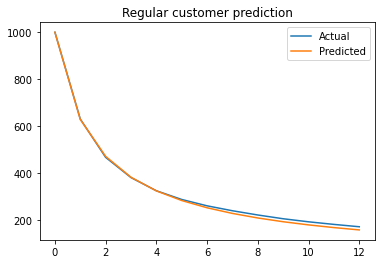

In [18]:
pyplot.plot(data['Year'], data['"Regular"'])
pyplot.plot(data['Year'], data['regular_predict'])
pyplot.legend(['Actual', 'Predicted'])
pyplot.title("Regular customer prediction")

Text(0.5, 1.0, 'High-end customer prediction')

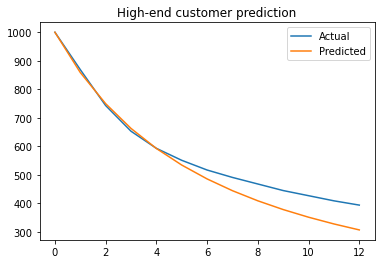

In [19]:
pyplot.plot(data['Year'], data['"High End"'])
pyplot.plot(data['Year'], data['high_end_predict'])
pyplot.legend(['Actual', 'Predicted'])
pyplot.title("High-end customer prediction")

## 4 year data Mape

In [20]:
regular_mape_05 = abs(data['"Regular"'][0:5] - data["regular_predict"][0:5]) / data['"Regular"'][0:5]
mean(regular_mape_05)

0.0033640892122886166

In [21]:
regular_mape_612 = abs(data['"Regular"'][5:13] - data["regular_predict"][5:13]) / data['"Regular"'][5:13]
mean(regular_mape_612)

0.05403081964597919

In [22]:
high_mape_05 = abs(data['"High End"'][0:5] - data["high_end_predict"][0:5]) / data['"High End"'][0:5]
mean(high_mape_05)

0.007297682341816451

In [23]:
high_mape_612 = abs(data['"High End"'][5:13] - data["high_end_predict"][5:13]) / data['"High End"'][5:13]
mean(high_mape_612)

0.13206719380995377

## 7 year data MAPE

In [24]:
regular = data['"Regular"'][:8]
high_end = data['"High End"'][:8]

In [25]:
regular_res = minimize(nbetageomLL, (1,1), (regular), method="nelder-mead",
               options={'xatol': 1e-08, 'disp': True},bounds=bnds)

Optimization terminated successfully.
         Current function value: 1680.265188
         Iterations: 68
         Function evaluations: 139


In [26]:
regular_constant = gammaln(regular_res.x[0]) + gammaln(regular_res.x[1]) - gammaln(regular_res.x[0] + regular_res.x[1])

In [27]:
regular_predict = []
for every_year in year:
    regular = math.exp(gammaln(regular_res.x[0]) + gammaln(regular_res.x[1] + every_year) 
                             - gammaln(regular_res.x[0] + regular_res.x[1] + every_year) - regular_constant) * 1000
    regular_predict.append(regular)

In [28]:
data["regular_predict_7"] = regular_predict

In [29]:
data

,Year,"""Regular""","""High End""",regular_predict,high_end_predict,regular_predict_7
0,0,1000,1000,1000.000000,1000.000000,1000.000000
1,1,631,869,629.197957,858.788945,626.706063
2,2,468,743,472.147048,749.559569,473.819330
3,3,382,653,383.327576,662.834165,387.973961
4,4,326,593,325.469256,592.496192,332.067917
5,5,289,551,284.451068,534.432323,292.347104
6,6,262,517,253.680403,485.780643,262.455822
7,7,241,491,229.643305,444.492156,239.023617
8,8,223,468,210.285650,409.063663,220.084969
9,9,207,445,194.321845,378.368919,204.410789


In [30]:
regular_mape_08 = abs(data['"Regular"'][0:8] - data["regular_predict_7"][0:8]) / data['"Regular"'][0:8]
mean(regular_mape_08)

0.009376691469464961

In [31]:
regular_mape_812 = abs(data['"Regular"'][8:13] - data["regular_predict_7"][8:13]) / data['"Regular"'][8:13]
mean(regular_mape_812)

0.014863882781165377

In [32]:
high_res = minimize(nbetageomLL, (1,1), (high_end), method="nelder-mead",
               options={'xatol': 1e-08, 'disp': True},bounds=bnds)

Optimization terminated successfully.
         Current function value: 1611.158147
         Iterations: 78
         Function evaluations: 164


In [33]:
high_constant = gammaln(high_res.x[0]) + gammaln(high_res.x[1]) - gammaln(high_res.x[0] + high_res.x[1])
high_constant

-0.5630569864412258

In [34]:
high_predict = []
for every_year in year:
    high = math.exp(gammaln(high_res.x[0]) + gammaln(high_res.x[1] + every_year) - gammaln(high_res.x[0] + high_res.x[1] + every_year) - high_constant) * 1000
    high_predict.append(high)

In [35]:
data["high_end_predict_7"] = high_predict

In [36]:
data

,Year,"""Regular""","""High End""",regular_predict,high_end_predict,regular_predict_7,high_end_predict_7
0,0,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000
1,1,631,869,629.197957,858.788945,626.706063,850.679274
2,2,468,743,472.147048,749.559569,473.819330,746.859425
3,3,382,653,383.327576,662.834165,387.973961,669.788998
4,4,326,593,325.469256,592.496192,332.067917,609.919149
5,5,289,551,284.451068,534.432323,292.347104,561.834294
6,6,262,517,253.680403,485.780643,262.455822,522.215580
7,7,241,491,229.643305,444.492156,239.023617,488.906429
8,8,223,468,210.285650,409.063663,220.084969,460.439680
9,9,207,445,194.321845,378.368919,204.410789,435.779597


In [37]:
high_mape_07 = abs(data['"High End"'][0:8] - data["high_end_predict_7"][0:8]) / data['"High End"'][0:8]
mean(high_mape_07)

0.01431674394626515

In [38]:
high_mape_812 = abs(data['"High End"'][8:13] - data["high_end_predict_7"][8:13]) / data['"High End"'][8:13]
mean(high_mape_812)

0.028324347459442435

Text(0.5, 1.0, '7 years data')

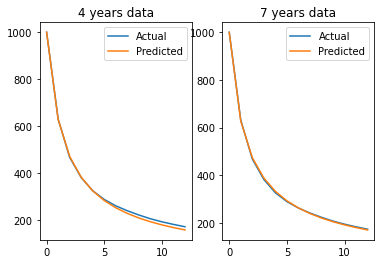

In [54]:
pyplot.subplot(1, 2, 1)
pyplot.plot(data['Year'], data['"Regular"'])
pyplot.plot(data['Year'], data['regular_predict'])
pyplot.legend(['Actual', 'Predicted'])
pyplot.title("4 years data")
pyplot.subplot(1, 2, 2)
pyplot.plot(data['Year'], data['"Regular"'])
pyplot.plot(data['Year'], data['regular_predict_7'])
pyplot.legend(['Actual', 'Predicted'])
pyplot.title("7 years data")

Text(0.5, 1.0, '7 years data')

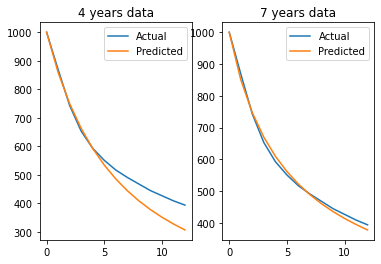

In [55]:
pyplot.subplot(1, 2, 1)
pyplot.plot(data['Year'], data['"High End"'])
pyplot.plot(data['Year'], data['high_end_predict'])
pyplot.legend(['Actual', 'Predicted'])
pyplot.title("4 years data")
pyplot.subplot(1, 2, 2)
pyplot.plot(data['Year'], data['"High End"'])
pyplot.plot(data['Year'], data['high_end_predict_7'])
pyplot.legend(['Actual', 'Predicted'])
pyplot.title("7 years data")